In [31]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [32]:
# For cleaner plots
plt.style.use('seaborn-v0_8')
sns.set_palette('Set2')

In [33]:
# Load datasets
matches = pd.read_csv('/content/matches_dataset.csv')
deliveries = pd.read_csv('/content/deliveries_dataset.csv')

In [34]:
# Check shape
print("Matches Dataset Shape:", matches.shape)
print("Deliveries Dataset Shape:", deliveries.shape)

Matches Dataset Shape: (816, 17)
Deliveries Dataset Shape: (193468, 18)


In [35]:
# Check columns and datatypes
print("\nMatches Dataset Info:")
print(matches.info())

print("\nDeliveries Dataset Info:")
print(deliveries.info())


Matches Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object

In [36]:
# View first few rows
matches.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [37]:
deliveries.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [38]:
# Check missing values
print("Missing values in Matches Dataset:\n", matches.isnull().sum())
print("\nMissing values in Deliveries Dataset:\n", deliveries.isnull().sum())

Missing values in Matches Dataset:
 id                   0
city                13
date                 0
player_of_match      4
venue                0
neutral_venue        0
team1                0
team2                0
toss_winner          0
toss_decision        0
winner               4
result               4
result_margin       17
eliminator           4
method             797
umpire1              0
umpire2              0
dtype: int64

Missing values in Deliveries Dataset:
 id                       0
inning                   0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
batsman_runs             0
extra_runs               0
total_runs               0
non_boundary             0
is_wicket                0
dismissal_kind      183973
player_dismissed    183973
fielder             186684
extras_type         183235
batting_team             0
bowling_team           191
dtype: int64


In [39]:

# Fill missing city names with "Unknown"
matches['city'].fillna("Unknown", inplace=True)

# Drop rows with other critical missing values (if any)
matches.dropna(subset=['winner'], inplace=True)

In [40]:
# Only deliveries with a dismissal
wicket_deliveries = deliveries[deliveries['dismissal_kind'].notnull()]


In [41]:
# Optional: fill with 'None' if needed for analysis
deliveries['extras_type'] = deliveries['extras_type'].fillna('None')

In [42]:
# Drop rows where bowling_team is missing
deliveries = deliveries.dropna(subset=['bowling_team'])

# Result
print("Cleaned Deliveries Dataset Missing Values:\n")
print(deliveries.isnull().sum())

Cleaned Deliveries Dataset Missing Values:

id                       0
inning                   0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
batsman_runs             0
extra_runs               0
total_runs               0
non_boundary             0
is_wicket                0
dismissal_kind      183792
player_dismissed    183792
fielder             186500
extras_type              0
batting_team             0
bowling_team             0
dtype: int64


In [43]:
# Convert categorical text columns to category
categorical_cols = ['batting_team', 'bowling_team', 'batsman', 'bowler', 'player_dismissed', 'dismissal_kind']
for col in categorical_cols:
    deliveries[col] = deliveries[col].astype('category')


In [44]:
# Merge datasets on match ID
combined_df = deliveries.merge(matches, left_on='id', right_on='id', how='left')

In [45]:
matches['date'] = pd.to_datetime(matches['date'])
matches['season'] = matches['date'].dt.year

In [46]:
# 1. What was the count of matches played in each season?

# Count matches per season
matches_per_season = matches['season'].value_counts().sort_index()

# Display as table
print(matches_per_season)

season
2008    58
2009    57
2010    60
2011    72
2012    74
2013    76
2014    60
2015    57
2016    60
2017    59
2018    60
2019    59
2020    60
Name: count, dtype: int64


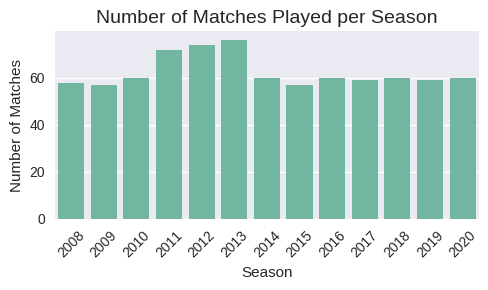

In [47]:
# Plot
plt.figure(figsize=(5,3))
sns.barplot(x=matches_per_season.index, y=matches_per_season.values)
plt.title("Number of Matches Played per Season", fontsize=14)
plt.xlabel("Season")
plt.ylabel("Number of Matches")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [48]:
# 2. How many runs were scored in each season?

# Add the 'season' column to combined_df
combined_df['season'] = pd.to_datetime(combined_df['date']).dt.year

# Group combined_df by season
runs_per_season = combined_df.groupby('season')['total_runs'].sum()

# Display
print(runs_per_season)

season
2008.0    17937
2009.0    16320
2010.0    18864
2011.0    21098
2012.0    22453
2013.0    22541
2014.0    18909
2015.0    17943
2016.0    18862
2017.0    18769
2018.0    19901
2019.0    19297
2020.0    19352
Name: total_runs, dtype: int64


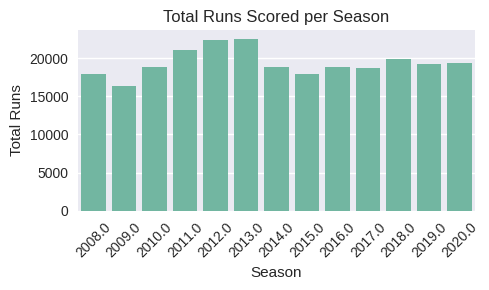

In [49]:
# Plot
plt.figure(figsize=(5,3))
sns.barplot(x=runs_per_season.index, y=runs_per_season.values)
plt.title("Total Runs Scored per Season")
plt.xlabel("Season")
plt.ylabel("Total Runs")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [50]:
# 3. What were the runs scored per match in different seasons?

# Calculate runs per match
runs_per_match = runs_per_season / matches_per_season

# Display
print(runs_per_match)


season
2008.0    309.258621
2009.0    286.315789
2010.0    314.400000
2011.0    293.027778
2012.0    303.418919
2013.0    296.592105
2014.0    315.150000
2015.0    314.789474
2016.0    314.366667
2017.0    318.118644
2018.0    331.683333
2019.0    327.067797
2020.0    322.533333
dtype: float64


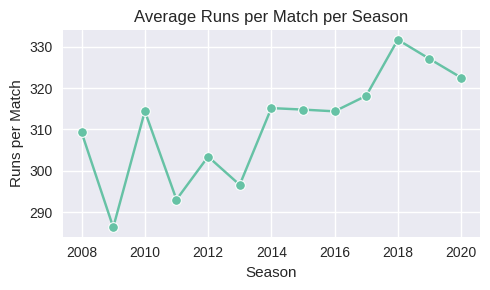

In [51]:
# Plot
plt.figure(figsize=(5,3))
sns.lineplot(x=runs_per_match.index, y=runs_per_match.values, marker='o')
plt.title("Average Runs per Match per Season")
plt.xlabel("Season")
plt.ylabel("Runs per Match")
plt.grid(True)
plt.tight_layout()
plt.show()

In [52]:
# 4. Who has umpired the most?

# Combine both columns
umpires = pd.concat([matches['umpire1'], matches['umpire2']])

# Count and sort
umpire_counts = umpires.value_counts().head(10)
print(umpire_counts)

S Ravi             121
HDPK Dharmasena     93
AK Chaudhary        87
C Shamshuddin       82
M Erasmus           65
CK Nandan           57
Nitin Menon         57
SJA Taufel          55
Asad Rauf           51
VA Kulkarni         50
Name: count, dtype: int64


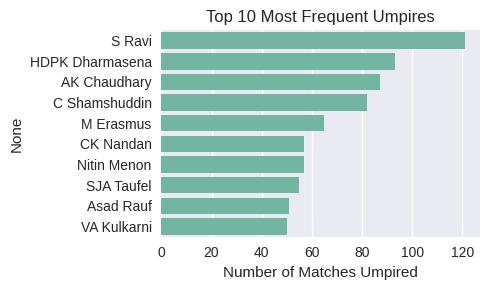

In [53]:
# Plot
plt.figure(figsize=(5,3))
sns.barplot(x=umpire_counts.values, y=umpire_counts.index)
plt.title("Top 10 Most Frequent Umpires")
plt.xlabel("Number of Matches Umpired")
plt.tight_layout()
plt.show()


In [54]:
# 5. Which team has won the most tosses?

# Count toss wins
toss_wins = matches['toss_winner'].value_counts()

# Display
print(toss_wins)


toss_winner
Mumbai Indians                 106
Kolkata Knight Riders           98
Chennai Super Kings             97
Royal Challengers Bangalore     86
Rajasthan Royals                85
Kings XI Punjab                 85
Delhi Daredevils                79
Sunrisers Hyderabad             57
Deccan Chargers                 43
Pune Warriors                   20
Delhi Capitals                  20
Gujarat Lions                   15
Kochi Tuskers Kerala             8
Rising Pune Supergiants          7
Rising Pune Supergiant           6
Name: count, dtype: int64


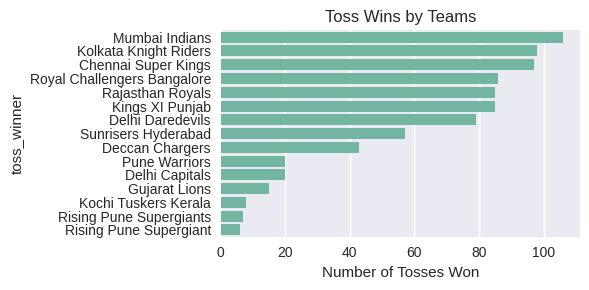

In [55]:
# Plot
plt.figure(figsize=(6,3))
sns.barplot(x=toss_wins.values, y=toss_wins.index)
plt.title("Toss Wins by Teams")
plt.xlabel("Number of Tosses Won")
plt.tight_layout()
plt.show()

In [56]:
# 6. What does the team decide after winning the toss?

# Count toss decisions
toss_decisions = matches['toss_decision'].value_counts()
print(toss_decisions)

toss_decision
field    493
bat      319
Name: count, dtype: int64


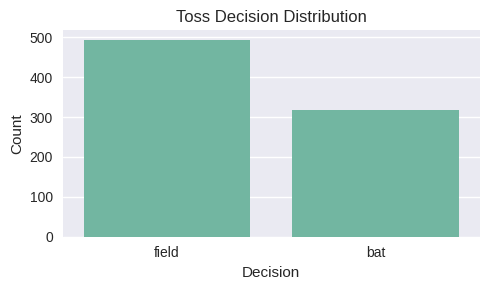

In [57]:
# Plot
plt.figure(figsize=(5,3))
sns.barplot(x=toss_decisions.index, y=toss_decisions.values)
plt.title("Toss Decision Distribution")
plt.xlabel("Decision")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


In [58]:
# 7. How does the toss decision vary across seasons?

# Group by season and toss decision
toss_decision_by_season = matches.groupby(['season', 'toss_decision']).size().unstack()

# Display
print(toss_decision_by_season)


toss_decision  bat  field
season                   
2008            26     32
2009            35     22
2010            39     21
2011            24     48
2012            37     37
2013            45     31
2014            19     41
2015            25     32
2016            11     49
2017            11     48
2018            10     50
2019            10     49
2020            27     33


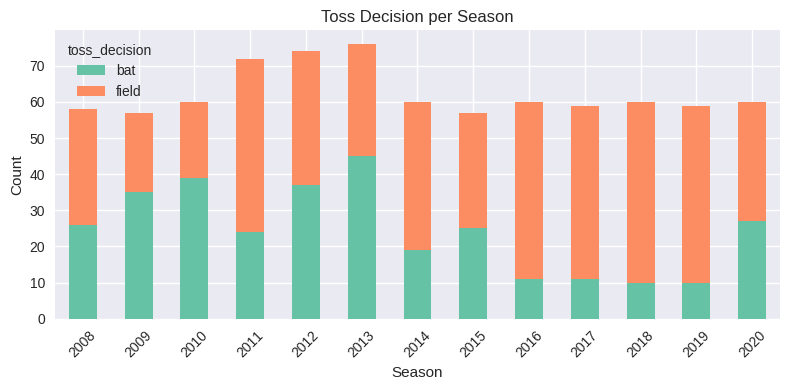

In [59]:
# Plot
toss_decision_by_season.plot(kind='bar', stacked=True, figsize=(8,4))
plt.title("Toss Decision per Season")
plt.xlabel("Season")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [61]:
# 8. Does winning the toss imply winning the game?

# Count matches where toss winner also won the match
toss_match_winner = matches[matches['toss_winner'] == matches['winner']]
success_rate = len(toss_match_winner) / len(matches) * 100

print(f"Toss winner also won the match in {len(toss_match_winner)} out of {len(matches)} matches.")
print(f"Success Rate: {success_rate:.2f}%")


Toss winner also won the match in 418 out of 812 matches.
Success Rate: 51.48%


In [63]:
# Check for nulls in relevant columns for Q9
print(matches[['toss_decision', 'toss_winner', 'winner']].isnull().sum())


toss_decision    0
toss_winner      0
winner           0
dtype: int64


In [62]:
# 9. How many times has the chasing team won the match?

# Create column to check if team that chose to field won
matches['chasing_team_won'] = (matches['toss_decision'] == 'field') & (matches['toss_winner'] == matches['winner'])

# Count
chasing_wins = matches['chasing_team_won'].sum()
print(f"Chasing team won {chasing_wins} matches.")


Chasing team won 273 matches.


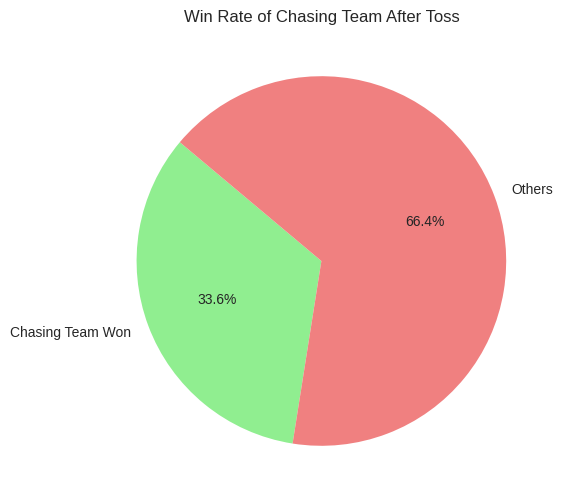

In [65]:
# Pie chart of chasing vs others
labels = ['Chasing Team Won', 'Others']
values = [chasing_wins, len(matches) - chasing_wins]

plt.figure(figsize=(6,6))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140, colors=['lightgreen', 'lightcoral'])
plt.title("Win Rate of Chasing Team After Toss")
plt.show()

In [66]:
# 10. Which all teams had won this tournament?

# Get the last match ID per season (assumed to be the final)
finals = matches.dropna(subset=['winner']).sort_values(['season', 'date']).groupby('season').tail(1)

# Tournament winners
tournament_winners = finals[['season', 'winner']].reset_index(drop=True)
print(tournament_winners)


    season                 winner
0     2008       Rajasthan Royals
1     2009        Deccan Chargers
2     2010    Chennai Super Kings
3     2011    Chennai Super Kings
4     2012  Kolkata Knight Riders
5     2013         Mumbai Indians
6     2014  Kolkata Knight Riders
7     2015         Mumbai Indians
8     2016    Sunrisers Hyderabad
9     2017         Mumbai Indians
10    2018    Chennai Super Kings
11    2019         Mumbai Indians
12    2020         Mumbai Indians


In [68]:
# 11. Which team has played the most number of matches?

team1_counts = matches['team1'].value_counts()
team2_counts = matches['team2'].value_counts()
total_matches_played = team1_counts.add(team2_counts, fill_value=0).astype(int).sort_values(ascending=False)

print("🏏 Total Matches Played:\n")
print(total_matches_played)


🏏 Total Matches Played:

Mumbai Indians                 203
Kolkata Knight Riders          192
Royal Challengers Bangalore    192
Kings XI Punjab                190
Chennai Super Kings            178
Rajasthan Royals               159
Delhi Daredevils               159
Sunrisers Hyderabad            124
Deccan Chargers                 75
Pune Warriors                   45
Delhi Capitals                  33
Gujarat Lions                   30
Rising Pune Supergiant          16
Kochi Tuskers Kerala            14
Rising Pune Supergiants         14
Name: count, dtype: int64


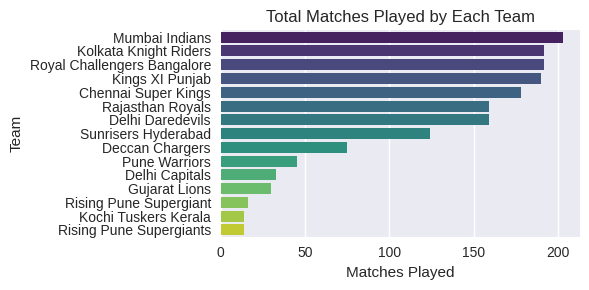

In [70]:
# plot

plt.figure(figsize=(6,3))
sns.barplot(x=total_matches_played.values, y=total_matches_played.index, palette="viridis")
plt.title("Total Matches Played by Each Team")
plt.xlabel("Matches Played")
plt.ylabel("Team")
plt.tight_layout()
plt.show()


In [71]:
# 12. Which team has won the most number of times?

team_wins = matches['winner'].value_counts().sort_values(ascending=False)
print("Most Match Wins:\n")
print(team_wins)

Most Match Wins:

winner
Mumbai Indians                 120
Chennai Super Kings            106
Kolkata Knight Riders           99
Royal Challengers Bangalore     91
Kings XI Punjab                 88
Rajasthan Royals                81
Delhi Daredevils                67
Sunrisers Hyderabad             66
Deccan Chargers                 29
Delhi Capitals                  19
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: count, dtype: int64


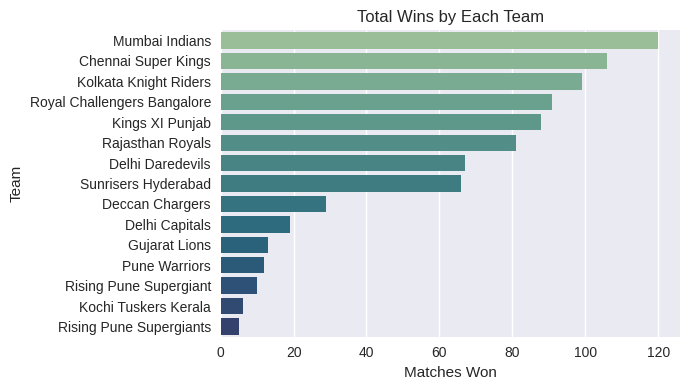

In [73]:
# plot

plt.figure(figsize=(7,4))
sns.barplot(x=team_wins.values, y=team_wins.index, palette="crest")
plt.title("Total Wins by Each Team")
plt.xlabel("Matches Won")
plt.ylabel("Team")
plt.tight_layout()
plt.show()


In [74]:
# 13. Which team has the highest winning percentage?

team_stats = pd.DataFrame({
    'Matches Played': total_matches_played,
    'Matches Won': team_wins
}).fillna(0)

team_stats['Winning %'] = (team_stats['Matches Won'] / team_stats['Matches Played']) * 100
team_stats = team_stats.sort_values('Winning %', ascending=False)

print("📈 Highest Winning Percentage:\n")
print(team_stats)


📈 Highest Winning Percentage:

                             Matches Played  Matches Won  Winning %
Rising Pune Supergiant                   16           10  62.500000
Chennai Super Kings                     178          106  59.550562
Mumbai Indians                          203          120  59.113300
Delhi Capitals                           33           19  57.575758
Sunrisers Hyderabad                     124           66  53.225806
Kolkata Knight Riders                   192           99  51.562500
Rajasthan Royals                        159           81  50.943396
Royal Challengers Bangalore             192           91  47.395833
Kings XI Punjab                         190           88  46.315789
Gujarat Lions                            30           13  43.333333
Kochi Tuskers Kerala                     14            6  42.857143
Delhi Daredevils                        159           67  42.138365
Deccan Chargers                          75           29  38.666667
Rising Pune Super

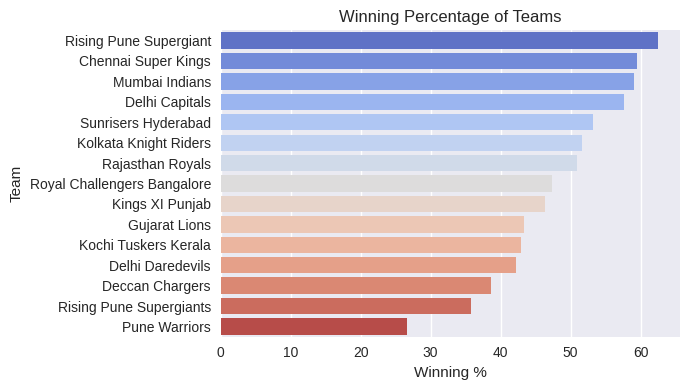

In [87]:
plt.figure(figsize=(7,4))
sns.barplot(x=team_stats['Winning %'], y=team_stats.index, palette="coolwarm")
plt.title("Winning Percentage of Teams")
plt.xlabel("Winning %")
plt.ylabel("Team")
plt.tight_layout()
plt.show()


In [75]:
# 14. Is there any lucky venue for a particular team?

venue_wins = matches.groupby(['venue', 'winner']).size().reset_index(name='win_count')
lucky_venue_per_team = venue_wins.sort_values('win_count', ascending=False).groupby('venue').first().reset_index()

print("Lucky Venues per Team:\n")
print(lucky_venue_per_team.head(10))  # Show top 10


Lucky Venues per Team:

                                               venue                 winner  \
0                                   Barabati Stadium        Deccan Chargers   
1                                  Brabourne Stadium         Mumbai Indians   
2                                       Buffalo Park         Mumbai Indians   
3                              De Beers Diamond Oval        Deccan Chargers   
4                         Dr DY Patil Sports Academy         Mumbai Indians   
5  Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...    Sunrisers Hyderabad   
6                Dubai International Cricket Stadium    Sunrisers Hyderabad   
7                                       Eden Gardens  Kolkata Knight Riders   
8                                   Feroz Shah Kotla       Delhi Daredevils   
9                                         Green Park          Gujarat Lions   

   win_count  
0          3  
1          6  
2          1  
3          1  
4          5  
5          3  
6

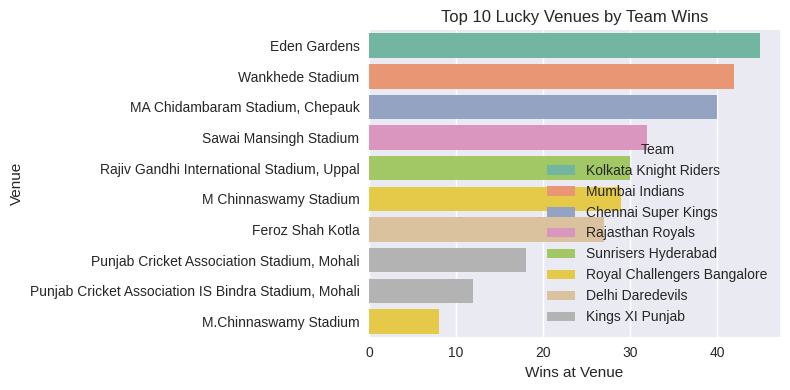

In [88]:
top_venues = lucky_venue_per_team.sort_values('win_count', ascending=False).head(10)

plt.figure(figsize=(8,4))
sns.barplot(data=top_venues, x='win_count', y='venue', hue='winner', dodge=False)
plt.title("Top 10 Lucky Venues by Team Wins")
plt.xlabel("Wins at Venue")
plt.ylabel("Venue")
plt.legend(title='Team')
plt.tight_layout()
plt.show()


In [77]:
# 15. Innings wise comparison between teams

# Merge deliveries with match innings
deliveries_innings = deliveries.merge(matches[['id', 'season']], left_on='id', right_on='id')

# Group by team and inning to get total runs
team_inning_runs = deliveries_innings.groupby(['batting_team', 'inning'])['total_runs'].sum().unstack()

print("Innings-wise Total Runs per Team:\n")
print(team_inning_runs)

Innings-wise Total Runs per Team:

inning                           1      2
batting_team                             
Chennai Super Kings          15344  13019
Deccan Chargers               6765   4698
Delhi Capitals                2860   2436
Delhi Daredevils             11004  13038
Gujarat Lions                 2267   2589
Kings XI Punjab              15710  14307
Kochi Tuskers Kerala          1009    892
Kolkata Knight Riders        14842  14541
Mumbai Indians               18338  13948
Pune Warriors                 2973   3385
Rajasthan Royals             11236  13230
Rising Pune Supergiant        1304   1166
Rising Pune Supergiants       1123    940
Royal Challengers Bangalore  15512  14438
Sunrisers Hyderabad          11277   8055


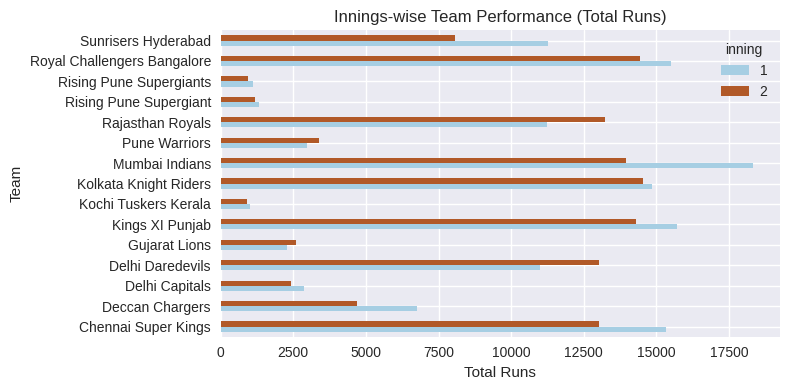

In [89]:
team_inning_runs.plot(kind='barh', figsize=(8,4), colormap='Paired')
plt.title("Innings-wise Team Performance (Total Runs)")
plt.xlabel("Total Runs")
plt.ylabel("Team")
plt.tight_layout()
plt.show()


In [79]:
# 16. Which team has scored the most number of 200+ scores?

# Total runs per match per team
team_match_scores = deliveries.groupby(['id', 'batting_team'])['total_runs'].sum().reset_index()

# Filter scores >= 200
scores_200 = team_match_scores[team_match_scores['total_runs'] >= 200]

# Count per team
high_score_counts = scores_200['batting_team'].value_counts()
print("200+ Scores by Team:\n")
print(high_score_counts)

200+ Scores by Team:

batting_team
Royal Challengers Bangalore    18
Chennai Super Kings            17
Kings XI Punjab                14
Mumbai Indians                 14
Sunrisers Hyderabad            12
Kolkata Knight Riders          12
Rajasthan Royals                9
Delhi Daredevils                5
Delhi Capitals                  2
Deccan Chargers                 1
Gujarat Lions                   1
Kochi Tuskers Kerala            0
Pune Warriors                   0
Rising Pune Supergiants         0
Rising Pune Supergiant          0
Name: count, dtype: int64


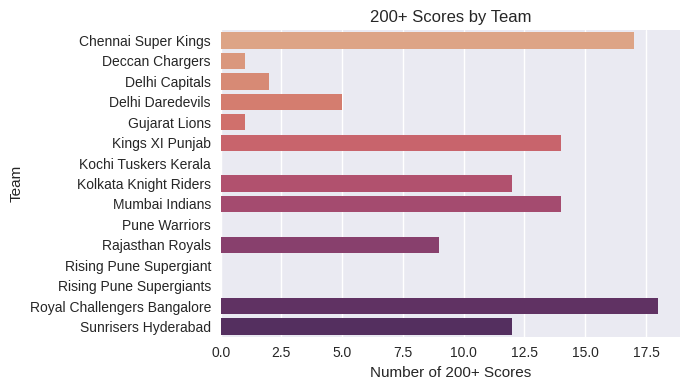

In [90]:
plt.figure(figsize=(7,4))
sns.barplot(x=high_score_counts.values, y=high_score_counts.index, palette='flare')
plt.title("200+ Scores by Team")
plt.xlabel("Number of 200+ Scores")
plt.ylabel("Team")
plt.tight_layout()
plt.show()


In [81]:
# 17. Which team has conceded 200+ scores the most?

# Total runs per match per team
team_match_scores = deliveries.groupby(['id', 'batting_team'])['total_runs'].sum().reset_index()
match_teams = matches[['id', 'team1', 'team2']]
team_match_scores = team_match_scores.merge(match_teams, left_on='id', right_on='id')

# Define opponent team
def get_opponent(row):
    return row['team2'] if row['batting_team'] == row['team1'] else row['team1']
team_match_scores['bowling_team'] = team_match_scores.apply(get_opponent, axis=1)

# Filter 200+ scores
scores_200 = team_match_scores[team_match_scores['total_runs'] >= 200]

# Count how many times each team conceded 200+
conceded_200 = scores_200['bowling_team'].value_counts()
print("Teams Conceding 200+ Runs:\n")
print(conceded_200)

Teams Conceding 200+ Runs:

bowling_team
Kings XI Punjab                20
Royal Challengers Bangalore    17
Chennai Super Kings            12
Delhi Daredevils               11
Rajasthan Royals               10
Kolkata Knight Riders          10
Mumbai Indians                  8
Sunrisers Hyderabad             7
Gujarat Lions                   3
Delhi Capitals                  3
Deccan Chargers                 2
Pune Warriors                   1
Rising Pune Supergiant          1
Name: count, dtype: int64


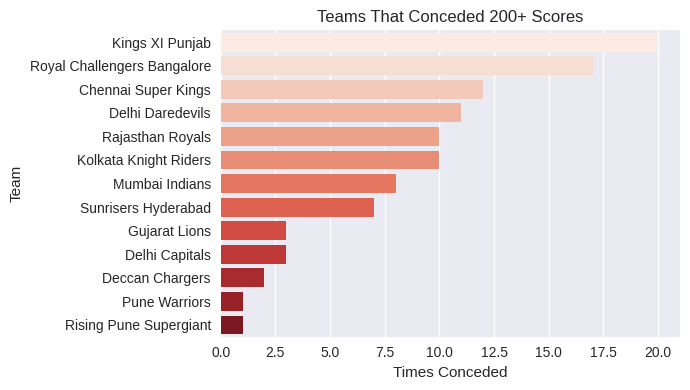

In [93]:
plt.figure(figsize=(7,4))
sns.barplot(x=conceded_200.values, y=conceded_200.index, palette='Reds')
plt.title("Teams That Conceded 200+ Scores")
plt.xlabel("Times Conceded")
plt.ylabel("Team")
plt.tight_layout()
plt.show()


In [83]:
# 18. What was the highest run scored by a team in a single match?

highest_score = team_match_scores.sort_values('total_runs', ascending=False).head(1)
print("Highest Team Score in a Match:\n")
print(highest_score[['batting_team', 'total_runs', 'id']])


Highest Team Score in a Match:

                     batting_team  total_runs      id
5263  Royal Challengers Bangalore         263  598027


In [85]:
# 19. Which is the biggest win in terms of run margin?

# Filter matches won by runs and sort by result_margin
biggest_run_win = matches[matches['result'] == 'runs'].sort_values('result_margin', ascending=False).head(1)

print("Biggest Win by Run Margin:\n")
print(biggest_run_win[['winner', 'result_margin', 'team1', 'team2']])

Biggest Win by Run Margin:

             winner  result_margin             team1           team2
620  Mumbai Indians          146.0  Delhi Daredevils  Mumbai Indians


In [103]:
# 20. Which batsmen have played the most number of balls?

balls_faced = deliveries['batsman'].value_counts().sort_values(ascending=False)
print("Most Balls Faced by Batsmen:\n")
print(balls_faced.head(10))


Most Balls Faced by Batsmen:

batsman
V Kohli       4605
S Dhawan      4208
RG Sharma     4088
SK Raina      4041
DA Warner     3809
RV Uthappa    3658
G Gambhir     3524
MS Dhoni      3493
CH Gayle      3338
AM Rahane     3325
Name: count, dtype: int64


In [100]:
# Add boundaries
deliveries['is_four'] = deliveries['batsman_runs'] == 4
deliveries['is_six'] = deliveries['batsman_runs'] == 6

# Add balls faced
deliveries['is_legit'] = deliveries['extras_type'].isin(['None', 'byes', 'legbyes'])

# Add powerplay (overs 1-6) and death overs (16-20)
deliveries['over_phase'] = deliveries['over'].apply(
    lambda x: 'Powerplay' if x <= 6 else ('Death' if x >= 17 else 'Middle')
)


In [101]:
# 21. Who are the leading run-scorers of all time?

top_scorers = deliveries.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False).head(10)
print("Top Scorers of All Time:\n")
print(top_scorers)


Top Scorers of All Time:

batsman
V Kohli           5877
SK Raina          5368
DA Warner         5235
RG Sharma         5230
S Dhawan          5197
AB de Villiers    4792
CH Gayle          4762
MS Dhoni          4632
RV Uthappa        4607
G Gambhir         4217
Name: batsman_runs, dtype: int64


In [106]:
# 22. Who has hit the most number of 4's?

fours = deliveries[deliveries['batsman_runs'] == 4]['batsman'].value_counts()
print(fours.head(10))

batsman
S Dhawan          591
DA Warner         509
V Kohli           504
SK Raina          493
G Gambhir         492
RG Sharma         458
RV Uthappa        454
AM Rahane         416
CH Gayle          383
AB de Villiers    381
Name: count, dtype: int64


In [109]:
# 23. Who has hit the most number of 6's?

sixes = deliveries[deliveries['batsman_runs'] == 6]['batsman'].value_counts()
print(sixes.head(10))


batsman
CH Gayle          348
AB de Villiers    234
MS Dhoni          216
RG Sharma         214
V Kohli           202
KA Pollard        198
SK Raina          194
DA Warner         193
SR Watson         190
RV Uthappa        163
Name: count, dtype: int64


In [111]:
# 24. Who has the highest strike rate?

balls_faced = deliveries[deliveries['is_legit']]['batsman'].value_counts()
runs = deliveries.groupby('batsman')['batsman_runs'].sum()

strike_rate = (runs / balls_faced) * 100
strike_rate = strike_rate[balls_faced >= 200].sort_values(ascending=False)
print("Top Strike Rates (min 200 balls faced):\n")
print(strike_rate.head(10))

Top Strike Rates (min 200 balls faced):

batsman
AD Russell        183.656174
N Pooran          165.923567
SP Narine         164.575646
HH Pandya         160.213777
CH Morris         158.333333
V Sehwag          156.871765
GJ Maxwell        155.475207
AB de Villiers    152.757412
RR Pant           152.531181
KA Pollard        150.773067
dtype: float64


In [113]:
# 25. Who is the leading wicket-taker?

wickets = deliveries[deliveries['dismissal_kind'].notna()]
wicket_takers = wickets['bowler'].value_counts()
print("Top Wicket Takers:\n")
print(wicket_takers.head(10))


Top Wicket Takers:

bowler
SL Malinga         188
DJ Bravo           175
A Mishra           169
PP Chawla          164
Harbhajan Singh    161
R Ashwin           153
B Kumar            146
SP Narine          143
UT Yadav           137
R Vinay Kumar      127
Name: count, dtype: int64


Top Stadiums by Matches Hosted:

venue
Eden Gardens                                  77
Wankhede Stadium                              73
Feroz Shah Kotla                              73
Rajiv Gandhi International Stadium, Uppal     64
M Chinnaswamy Stadium                         63
MA Chidambaram Stadium, Chepauk               57
Sawai Mansingh Stadium                        47
Punjab Cricket Association Stadium, Mohali    35
Dubai International Cricket Stadium           33
Sheikh Zayed Stadium                          29
Name: count, dtype: int64


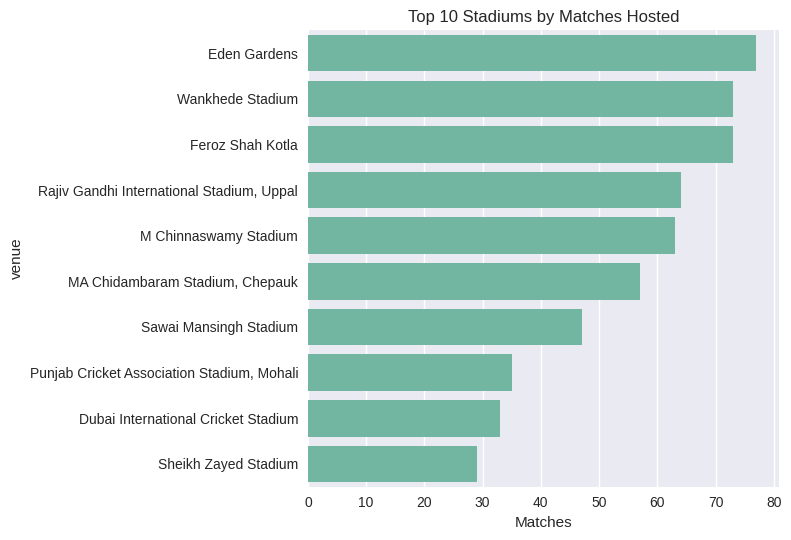

In [114]:
# 26. Which stadium has hosted the most number of matches?

venue_counts = matches['venue'].value_counts()
print("Top Stadiums by Matches Hosted:\n")
print(venue_counts.head(10))

#plot
sns.barplot(x=venue_counts.head(10).values, y=venue_counts.head(10).index)
plt.title("Top 10 Stadiums by Matches Hosted")
plt.xlabel("Matches")
plt.tight_layout()
plt.show()


In [115]:
# 27. Who has won the most MOM awards?

mom_counts = matches['player_of_match'].value_counts()
print("Most Man of the Match Awards:\n")
print(mom_counts.head(10))


Most Man of the Match Awards:

player_of_match
AB de Villiers    23
CH Gayle          22
RG Sharma         18
DA Warner         17
MS Dhoni          17
SR Watson         16
YK Pathan         16
SK Raina          14
V Kohli           13
G Gambhir         13
Name: count, dtype: int64


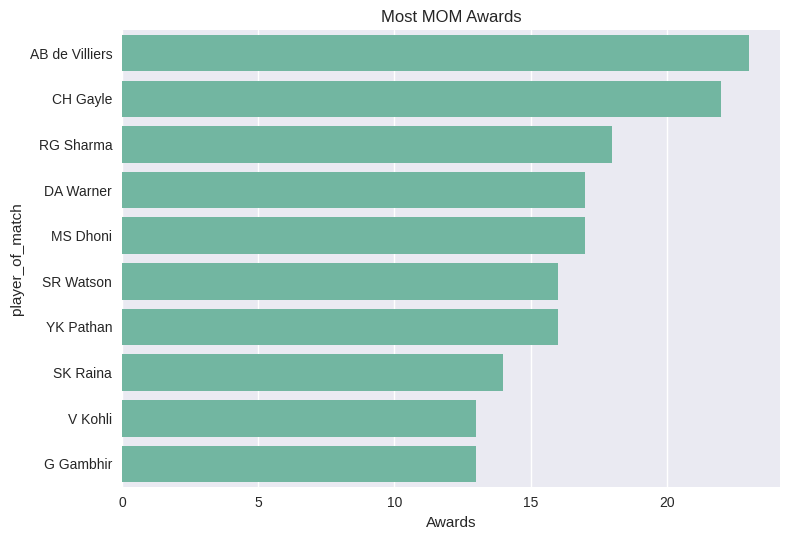

In [119]:
#plot

sns.barplot(x=mom_counts.head(10).values, y=mom_counts.head(10).index)
plt.title("Most MOM Awards")
plt.xlabel("Awards")
plt.tight_layout()
plt.show()

In [122]:
# 28. What is the count of fours hit in each season?

# Merge deliveries with match season
deliveries_with_season = deliveries.merge(matches[['id', 'season']], left_on='id', right_on='id', how='left')

fours_per_season = deliveries_with_season[deliveries_with_season['batsman_runs'] == 4].groupby('season').size()
print("Fours Hit per Season:\n")
print(fours_per_season)

Fours Hit per Season:

season
2008.0    1703
2009.0    1317
2010.0    1708
2011.0    1913
2012.0    1911
2013.0    2052
2014.0    1562
2015.0    1568
2016.0    1633
2017.0    1611
2018.0    1652
2019.0    1644
2020.0    1583
dtype: int64


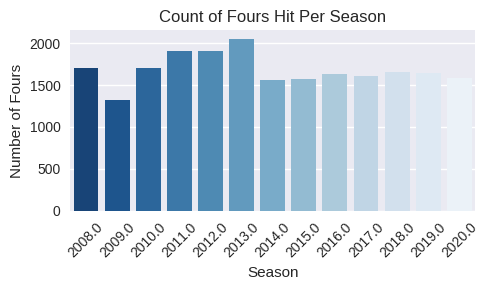

In [124]:
# Visualization
plt.figure(figsize=(5,3))
sns.barplot(x=fours_per_season.index, y=fours_per_season.values, palette='Blues_r')
plt.title("Count of Fours Hit Per Season")
plt.xlabel("Season")
plt.ylabel("Number of Fours")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [125]:
# 29. What is the count of sixes hit in each season?

sixes_per_season = deliveries_with_season[deliveries_with_season['batsman_runs'] == 6].groupby('season').size()
print("Sixes Hit per Season:\n")
print(sixes_per_season)



Sixes Hit per Season:

season
2008.0    623
2009.0    506
2010.0    585
2011.0    637
2012.0    733
2013.0    675
2014.0    714
2015.0    678
2016.0    639
2017.0    705
2018.0    872
2019.0    777
2020.0    735
dtype: int64


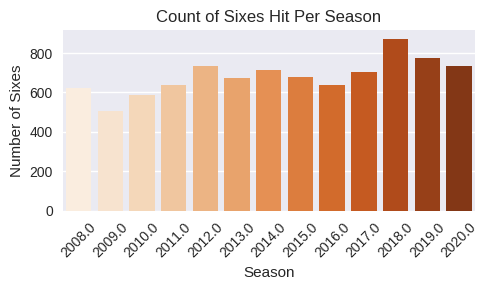

In [126]:
# plot

plt.figure(figsize=(5,3))
sns.barplot(x=sixes_per_season.index, y=sixes_per_season.values, palette='Oranges')
plt.title("Count of Sixes Hit Per Season")
plt.xlabel("Season")
plt.ylabel("Number of Sixes")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [127]:
# 30. What is the count of runs scored from boundaries in each season?

# Calculate boundary runs
boundary_runs_per_season = (fours_per_season * 4) + (sixes_per_season * 6)
print("Runs Scored from Boundaries per Season:\n")
print(boundary_runs_per_season)


Runs Scored from Boundaries per Season:

season
2008.0    10550
2009.0     8304
2010.0    10342
2011.0    11474
2012.0    12042
2013.0    12258
2014.0    10532
2015.0    10340
2016.0    10366
2017.0    10674
2018.0    11840
2019.0    11238
2020.0    10742
dtype: int64


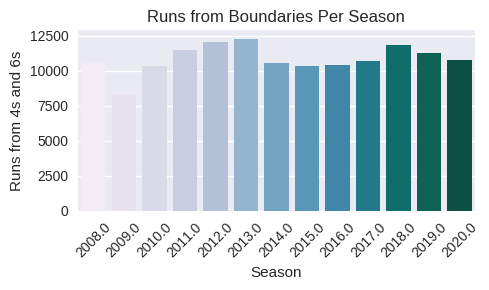

In [129]:
# Visualization
plt.figure(figsize=(5,3))
sns.barplot(x=boundary_runs_per_season.index, y=boundary_runs_per_season.values, palette='PuBuGn')
plt.title("Runs from Boundaries Per Season")
plt.xlabel("Season")
plt.ylabel("Runs from 4s and 6s")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [131]:
# 31. What is the run contribution from boundaries in each season?

total_runs_per_season = deliveries_with_season.groupby('season')['total_runs'].sum()
run_contribution_per_season = (boundary_runs_per_season / total_runs_per_season) * 100
print("Run Contribution from Boundaries per Season:\n")
print(run_contribution_per_season)

Run Contribution from Boundaries per Season:

season
2008.0    58.816971
2009.0    50.882353
2010.0    54.824003
2011.0    54.384302
2012.0    53.632031
2013.0    54.380906
2014.0    55.698345
2015.0    57.626930
2016.0    54.957057
2017.0    56.870371
2018.0    59.494498
2019.0    58.237032
2020.0    55.508475
dtype: float64


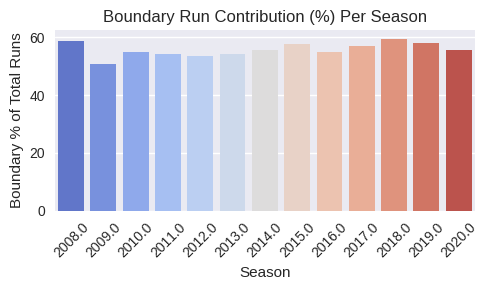

In [132]:
# Visualization
plt.figure(figsize=(5,3))
sns.barplot(x=run_contribution_per_season.index, y=run_contribution_per_season.values, palette='coolwarm')
plt.title("Boundary Run Contribution (%) Per Season")
plt.xlabel("Season")
plt.ylabel("Boundary % of Total Runs")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [134]:
pp_runs = deliveries[deliveries['over'] <= 6].groupby('batting_team')['total_runs'].sum().sort_values(ascending=False)
print("Powerplay Runs:\n")
print(pp_runs)


Powerplay Runs:

batting_team
Mumbai Indians                 10476
Kings XI Punjab                10248
Kolkata Knight Riders          10172
Royal Challengers Bangalore     9842
Chennai Super Kings             9266
Delhi Daredevils                8454
Rajasthan Royals                8231
Sunrisers Hyderabad             6700
Deccan Chargers                 3889
Pune Warriors                   2141
Gujarat Lions                   1812
Delhi Capitals                  1788
Rising Pune Supergiant           877
Kochi Tuskers Kerala             769
Rising Pune Supergiants          744
Name: total_runs, dtype: int64


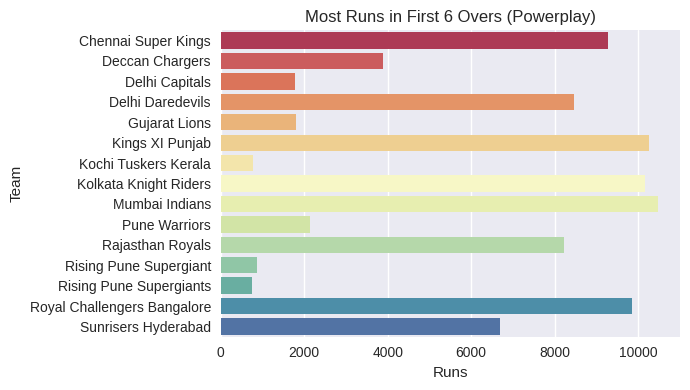

In [136]:
# Visualization
plt.figure(figsize=(7,4))
sns.barplot(x=pp_runs.values, y=pp_runs.index, palette='Spectral')
plt.title("Most Runs in First 6 Overs (Powerplay)")
plt.xlabel("Runs")
plt.ylabel("Team")
plt.tight_layout()
plt.show()

In [137]:
# 33. Which team has scored the most runs in the last 4 overs?

death_runs = deliveries[deliveries['over'] >= 17].groupby('batting_team')['total_runs'].sum().sort_values(ascending=False)
print("Runs in Last 4 Overs:\n")
print(death_runs)


Runs in Last 4 Overs:

batting_team
Mumbai Indians                 5708
Royal Challengers Bangalore    5056
Chennai Super Kings            5045
Kings XI Punjab                4649
Kolkata Knight Riders          4508
Delhi Daredevils               3709
Rajasthan Royals               3662
Sunrisers Hyderabad            3198
Deccan Chargers                1837
Pune Warriors                  1037
Delhi Capitals                  855
Gujarat Lions                   663
Rising Pune Supergiant          443
Rising Pune Supergiants         330
Kochi Tuskers Kerala            255
Name: total_runs, dtype: int64


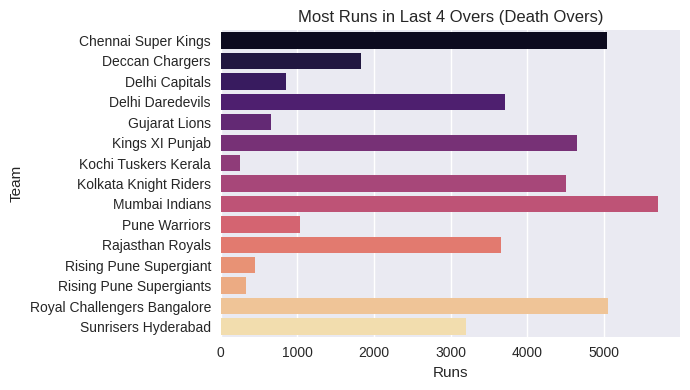

In [138]:
# Visualization
plt.figure(figsize=(7,4))
sns.barplot(x=death_runs.values, y=death_runs.index, palette='magma')
plt.title("Most Runs in Last 4 Overs (Death Overs)")
plt.xlabel("Runs")
plt.ylabel("Team")
plt.tight_layout()
plt.show()

In [139]:
# 34. Which team has the best scoring run-rate in the first 6 overs?

pp = deliveries[deliveries['over'] <= 6]

# Runs and overs faced
pp_runs_by_team = pp.groupby('batting_team')['total_runs'].sum()
pp_overs = pp.groupby('batting_team')['over'].nunique()

pp_rr = (pp_runs_by_team / pp_overs).sort_values(ascending=False)
print("Run Rate in First 6 Overs:\n")
print(pp_rr)


Run Rate in First 6 Overs:

batting_team
Mumbai Indians                 1496.571429
Kings XI Punjab                1464.000000
Kolkata Knight Riders          1453.142857
Royal Challengers Bangalore    1406.000000
Chennai Super Kings            1323.714286
Delhi Daredevils               1207.714286
Rajasthan Royals               1175.857143
Sunrisers Hyderabad             957.142857
Deccan Chargers                 555.571429
Pune Warriors                   305.857143
Gujarat Lions                   258.857143
Delhi Capitals                  255.428571
Rising Pune Supergiant          125.285714
Kochi Tuskers Kerala            109.857143
Rising Pune Supergiants         106.285714
dtype: float64


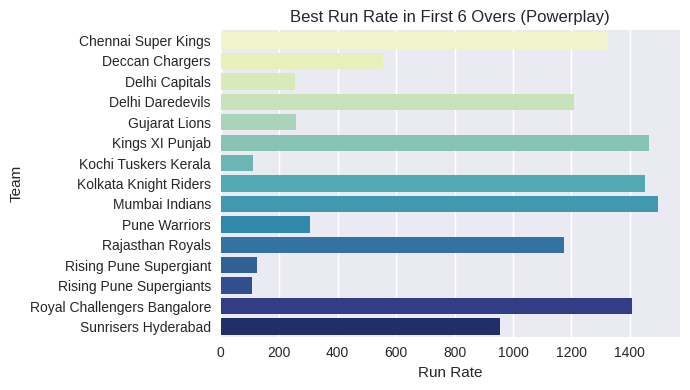

In [140]:
# Visualization
plt.figure(figsize=(7,4))
sns.barplot(x=pp_rr.values, y=pp_rr.index, palette='YlGnBu')
plt.title("Best Run Rate in First 6 Overs (Powerplay)")
plt.xlabel("Run Rate")
plt.ylabel("Team")
plt.tight_layout()
plt.show()

In [141]:
# 35. Which team has the best scoring run-rate in the last 4 overs?

death = deliveries[deliveries['over'] >= 17]

# Runs and overs faced
death_runs_by_team = death.groupby('batting_team')['total_runs'].sum()
death_overs = death.groupby('batting_team')['over'].nunique()

death_rr = (death_runs_by_team / death_overs).sort_values(ascending=False)
print("Run Rate in Last 4 Overs:\n")
print(death_rr)


Run Rate in Last 4 Overs:

batting_team
Mumbai Indians                 1902.666667
Royal Challengers Bangalore    1685.333333
Chennai Super Kings            1681.666667
Kings XI Punjab                1549.666667
Kolkata Knight Riders          1502.666667
Delhi Daredevils               1236.333333
Rajasthan Royals               1220.666667
Sunrisers Hyderabad            1066.000000
Deccan Chargers                 612.333333
Pune Warriors                   345.666667
Delhi Capitals                  285.000000
Gujarat Lions                   221.000000
Rising Pune Supergiant          147.666667
Rising Pune Supergiants         110.000000
Kochi Tuskers Kerala             85.000000
dtype: float64


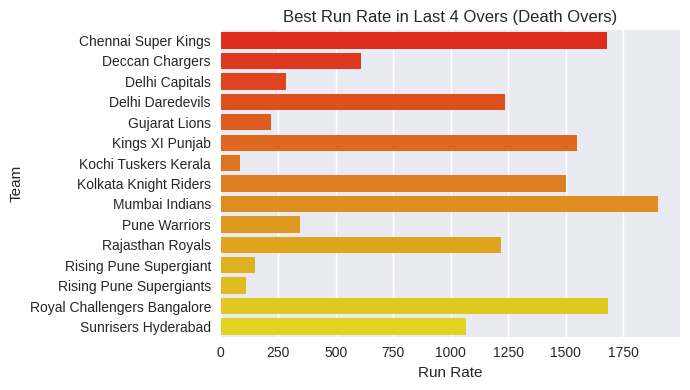

In [142]:
# Visualization
plt.figure(figsize=(7,4))
sns.barplot(x=death_rr.values, y=death_rr.index, palette='autumn')
plt.title("Best Run Rate in Last 4 Overs (Death Overs)")
plt.xlabel("Run Rate")
plt.ylabel("Team")
plt.tight_layout()
plt.show()